## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [104]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [146]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [147]:
import matplotlib.pyplot as plt 
%matplotlib inline



### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [148]:
from datetime import datetime

symbols= ["MSFT", "AMZN", "AAPL", "GOOG", "FB","TSLA"]
start_date= datetime(2019,1,1)
end_date= datetime(2019,7,1)
stock_data= web.get_data_yahoo(symbols,start_date,end_date)


In [149]:
stock_data

Attributes   Adj Close                                                   \
Symbols           MSFT         AMZN       AAPL         GOOG          FB   
Date                                                                      
2019-01-02   98.602066  1539.130005  38.562561  1045.849976  135.679993   
2019-01-03   94.974693  1500.280029  34.721451  1016.059998  131.740005   
2019-01-04   99.391899  1575.390015  36.203678  1070.709961  137.949997   
2019-01-07   99.518669  1629.510010  36.123104  1068.390015  138.050003   
2019-01-08  100.240234  1656.579956  36.811718  1076.280029  142.529999   
...                ...          ...        ...          ...         ...   
2019-06-25  131.146851  1878.270020  48.145855  1086.349976  188.839996   
2019-06-26  131.638290  1897.829956  49.187206  1079.800049  187.660004   
2019-06-27  131.854507  1904.280029  49.172436  1076.010010  189.500000   
2019-06-28  131.667801  1893.630005  48.724384  1080.910034  193.000000   
2019-07-01  133.358353  1922.189941  49.618027  1097.949951  193.000000   

Attributes                  Close                                       ...  \
Symbols          TSLA        MSFT         AMZN       AAPL         GOOG  ...   
Date                                                                    ...   
2019-01-02  62.023998  101.120003  1539.130005  39.480000  1045.849976  ...   
2019-01-03  60.071999   97.400002  1500.280029  35.547501  1016.059998  ...   
2019-01-04  63.537998  101.930000  1575.390015  37.064999  1070.709961  ...   
2019-01-07  66.991997  102.059998  1629.510010  36.982498  1068.390015  ...   
2019-01-08  67.070000  102.800003  1656.579956  37.687500  1076.280029  ...   
...               ...         ...          ...        ...          ...  ...   
2019-06-25  43.952000  133.429993  1878.270020  48.892502  1086.349976  ...   
2019-06-26  43.854000  133.929993  1897.829956  49.950001  1079.800049  ...   
2019-06-27  44.568001  134.149994  1904.280029  49.935001  1076.010010  ...   
2019-06-28  44.692001  133.960007  1893.630005  49.480000  1080.910034  ...   
2019-07-01  45.433998  135.679993  1922.189941  50.387501  1097.949951  ...   

Attributes       Open                                          Volume  \
Symbols          AAPL         GOOG          FB       TSLA        MSFT   
Date                                                                    
2019-01-02  38.722500  1016.570007  128.990005  61.220001  35329300.0   
2019-01-03  35.994999  1041.000000  134.690002  61.400002  42579100.0   
2019-01-04  36.132500  1032.589966  134.009995  61.200001  44060600.0   
2019-01-07  37.174999  1071.500000  137.559998  64.344002  35656100.0   
2019-01-08  37.389999  1076.109985  139.889999  68.391998  31514400.0   
...               ...          ...         ...        ...         ...   
2019-06-25  49.607498  1112.660034  192.880005  44.877998  33327400.0   
2019-06-26  49.442501  1086.500000  189.539993  44.062000  23657700.0   
2019-06-27  50.072498  1084.000000  189.880005  43.889999  16557500.0   
2019-06-28  49.669998  1076.390015  190.550003  44.198002  30043000.0   
2019-07-01  50.792500  1098.000000  195.210007  46.042000  22613500.0   

Attributes                                                             
Symbols          AMZN         AAPL       GOOG          FB        TSLA  
Date                                                                   
2019-01-02  7983100.0  148158800.0  1532600.0  28146200.0  58293000.0  
2019-01-03  6975600.0  365248800.0  1841100.0  22717900.0  34826000.0  
2019-01-04  9182600.0  234428400.0  2093900.0  29002100.0  36970500.0  
2019-01-07  7993200.0  219111200.0  1981900.0  20089300.0  37756000.0  
2019-01-08  8881400.0  164101200.0  1764900.0  26263800.0  35042500.0  
...               ...          ...        ...         ...         ...  
2019-06-25  3012300.0   84281200.0  1546900.0  16750300.0  30910500.0  
2019-06-26  2441900.0  104270000.0  1810900.0  12808600.0  42536000.0  
2019-06-27  2141700.0   835

### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

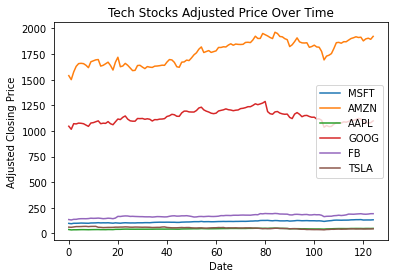

In [150]:
plt.plot(range(len(stock_data["Adj Close"])),stock_data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.legend(symbols)
plt.show()

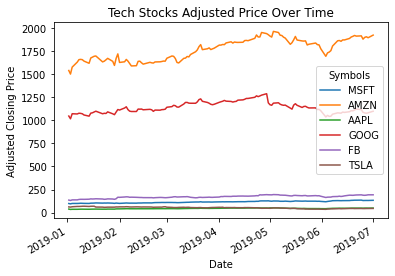

In [151]:

stock_data["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

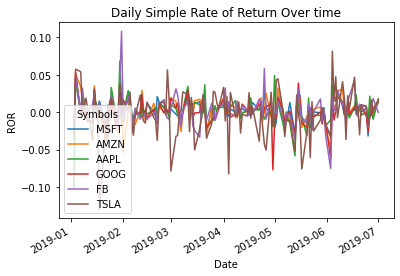

<Figure size 1152x648 with 0 Axes>

In [152]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()


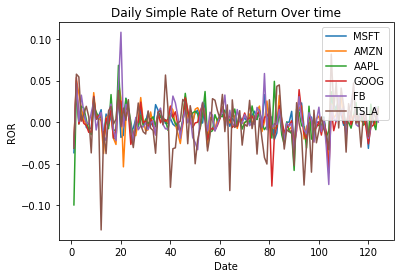

<Figure size 1152x648 with 0 Axes>

In [153]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
plt.plot(range(len(stock_data_daily_returns)),stock_data_daily_returns)
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.legend(symbols,loc =1)
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

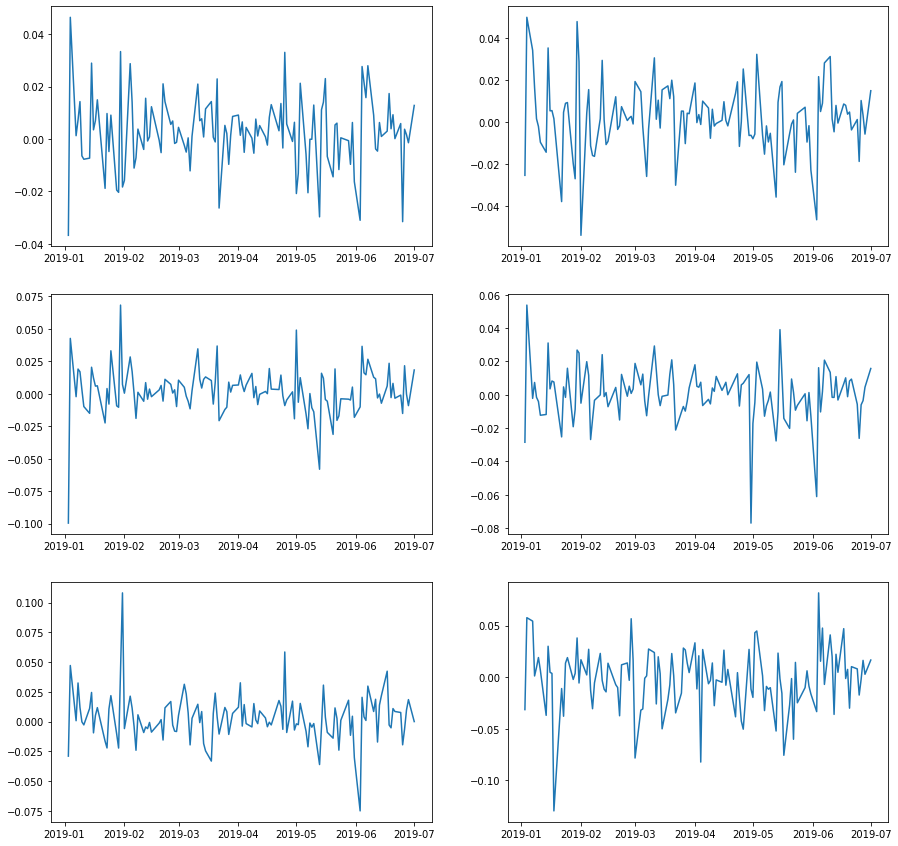

In [154]:
fig= plt.figure(figsize=(15,15))
ax1= fig.add_subplot(321)
ax2= fig.add_subplot(322)
ax3= fig.add_subplot(323)
ax4= fig.add_subplot(324)
ax5= fig.add_subplot(325)
ax6= fig.add_subplot(326)
ax1.plot(stock_data["Adj Close"]["MSFT"].pct_change())
ax2.plot(stock_data["Adj Close"]["AMZN"].pct_change())
ax3.plot(stock_data["Adj Close"]["AAPL"].pct_change())
ax4.plot(stock_data["Adj Close"]["GOOG"].pct_change())
ax5.plot(stock_data["Adj Close"]["FB"].pct_change())
ax6.plot(stock_data["Adj Close"]["TSLA"].pct_change())

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [168]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
daily_mean= stock_data_daily_returns.mean()
daily_mean

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
TSLA   -0.002043
dtype: float64

In [169]:
daily_means1=stock_data_daily_returns.sum()/len(stock_data_daily_returns)
daily_means1

Symbols
MSFT    0.002512
AMZN    0.001918
AAPL    0.002190
GOOG    0.000517
FB      0.003021
TSLA   -0.002027
dtype: float64

In [216]:
# this is the x_axis for the plot.bar()
x_values= list(daily_mean.keys())
x_values = x_values[:-1]
x_values

['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB']

In [217]:
#for the y values!
height =[]
for key,value in daily_mean.items():
    height.append(daily_mean[key])
height = height[:-1]
height



[0.0025323647487411247,
 0.001933041498626496,
 0.00220800106631423,
 0.0005215519241295212,
 0.003045827604161545]

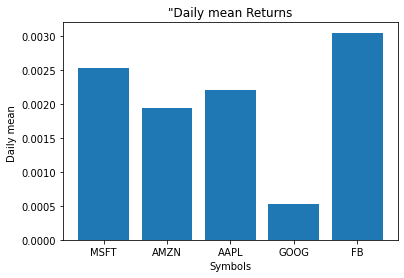

In [221]:
plt.bar(x_values,height)
plt.xlabel("Symbols")
plt.ylabel("Daily mean ")
plt.title('"Daily mean Returns')
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [228]:
variance_daily_mean = stock_data_daily_returns.var()
variance_daily_mean 


Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
TSLA    0.000918
dtype: float64

In [269]:
variance_daily_mean[symbols]

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
TSLA    0.000918
dtype: float64

In [241]:
x_values1= symbols
x_values1 =x_values1[:-1]
x_values1


['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB']

In [235]:
#y_values1 
height_variance =[]
for i in variance_daily_mean.keys():
    height_variance.append(variance_daily_mean[i])
height_variance = height_variance[:-1]


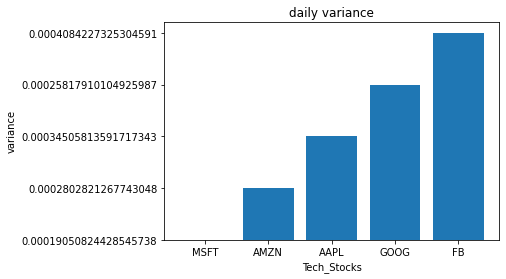

In [266]:
ax = plt.subplot()
plt.bar(range(len(x_values1)),range(len(height_variance)))
plt.xticks(range(len(x_values1)),x_values1)
plt.yticks(range(len(height_variance)),height_variance)

plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [272]:
std = np.sqrt(variance_daily_mean[symbols])
std

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
TSLA    0.030299
dtype: float64

In [274]:
std = np.sqrt(variance_daily_mean)
std

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
TSLA    0.030299
dtype: float64

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [275]:
stock_data_daily_returns.corr()

Symbols,MSFT,AMZN,AAPL,GOOG,FB,TSLA
Symbols,,,,,,
MSFT,1.000000,0.731493,0.652943,0.636986,0.454094,0.254993
AMZN,0.731493,1.000000,0.610109,0.721504,0.572073,0.322880
AAPL,0.652943,0.610109,1.000000,0.569772,0.438760,0.350214
GOOG,0.636986,0.721504,0.569772,1.000000,0.633440,0.258054
FB,0.454094,0.572073,0.438760,0.633440,1.000000,0.219773
TSLA,0.254993,0.322880,0.350214,0.258054,0.219773,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.